In [184]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import time as t
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as sklearnPreprocessing
from tqdm import tqdm

In [185]:
trainCsv = pd.read_csv('diabetes.csv')
trainCsv

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [186]:
trainDataset = trainCsv.to_numpy()
X, y = trainDataset[:, :-1], trainDataset[:, -1]
dataScaler = sklearnPreprocessing.StandardScaler()
X = dataScaler.fit_transform(X)
y = y.astype(int)

In [187]:
xTrain, xTest, yTrain, yTest = train_test_split(X, y)

100%|██████████| 999/999 [00:05<00:00, 184.27it/s]


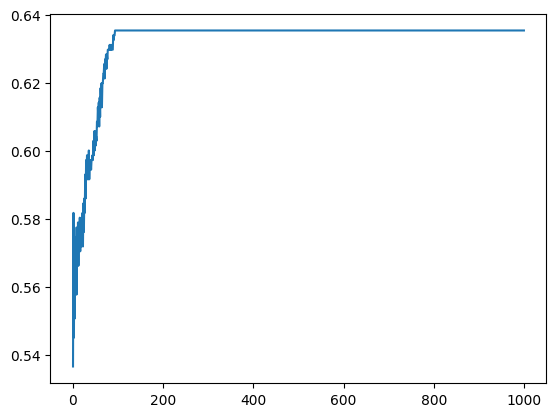

In [ ]:
class kNearestNeighbors:
    def __init__(self, X, y, k):
        self.X = np.concatenate((X, y.reshape(-1, 1)), axis=1)
        self.k = k

    def predict(self, x):
        dists = np.linalg.norm(x[:, np.newaxis, :] - self.X[np.newaxis, :, :-1], axis=2)
        sortedIndices = np.argsort(dists, axis=1)
        predictions = np.empty((x.shape[0], 1))
        for i in range(sortedIndices.shape[0]):
            res = self.X[sortedIndices[i]][:self.k]
            res = res[:, -1].astype(int)
            mostOccurrent = np.bincount(res).argmax()
            predictions[i] = mostOccurrent
        return predictions

kValues = []
accuracies = []
for kValue in tqdm(range(1, 1000)):
    knn = kNearestNeighbors(xTest, yTest, kValue)
    predictions = knn.predict(xTest)
    accuracy = np.mean(predictions == yTest)
    kValues.append(kValue)
    accuracies.append(accuracy)    

plt.plot(kValues, accuracies) 
plt.show()

In [189]:
print(max(accuracies), kValues[np.argmax(accuracies)])

0.6354166666666666 94
